Завдання:

1. Завантажте набір даних MNIST:
    - Використовуйте TensorFlow або інші джерела для отримання набору даних.

2. Підготуйте дані для тренування:
    - Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.

3. Створіть нейронну мережу:
    - Розробіть нейронну мережу з використанням повнозвязних шарів.
    - Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.

4. Тренуйте модель:
    - Навчіть модель на тренувальному наборі даних.
    - Експериментуйте з різними оптимізаторами та іншими гіперпараметрами.

5. Оцініть ефективність моделі:
    - Використовуйте тестувальний набір даних для оцінки точності моделі.
    - Візуалізуйте деякі результати класифікації.

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

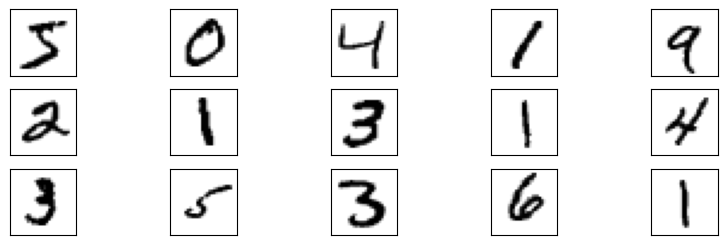

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [7]:
#створення моделі нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  #перетворення матриці 28x28 у вектор
    layers.Dense(128, activation='relu'),  
    layers.Dropout(0.2),  #dropout для уникнення перенавчання
    layers.Dense(10, activation='softmax')  #виихідний шар з активацією softmax для класифікації
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#навчання моделі з параметром batch_size
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nТочність на тестовому наборі:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 21s 9ms/step - loss: 0.2915 - accuracy: 0.9160 - val_loss: 0.1329 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1390 - accuracy: 0.9592 - val_loss: 0.1013 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1047 - accuracy: 0.9682 - val_loss: 0.0922 - val_accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0864 - accuracy: 0.9738 - val_loss: 0.0775 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0794 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0713 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.0716 - val_ac

1/1 [==============================] - 0s 19ms/step
[[1.1223610e-08 1.9501468e-10 4.4760160e-08 1.9985491e-05 5.3098644e-13
  8.3777365e-08 6.5403318e-17 9.9997914e-01 4.5493720e-09 6.8835385e-07]]


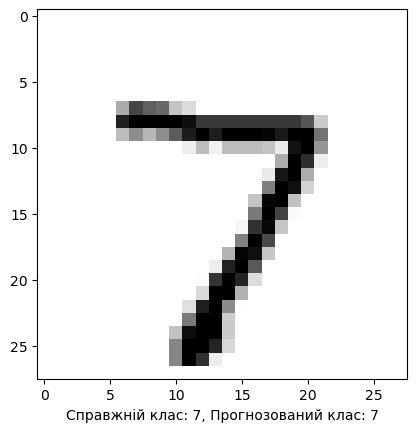

In [27]:
predictions = model.predict(X_test)

n = 0
x = X_test[n:n+1]
res = model.predict(x) #передбачуємо найбільш ймовірний результат
print(res)

def plot_image_and_prediction(image, true_label, predicted_label):
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(f"Справжній клас: {true_label}, Прогнозований клас: {predicted_label}")
    plt.show()

plot_image_and_prediction(X_test[n], y_test[n], np.argmax(res)) #беремо саме зображення, його визначення і найбільш ймовірне визначення, яке ми отримали
                                                                #запускаємо у функцію і дивимося візуально, чи зійшлися кредіти і дебети

313/313 [==============================] - 1s 4ms/step


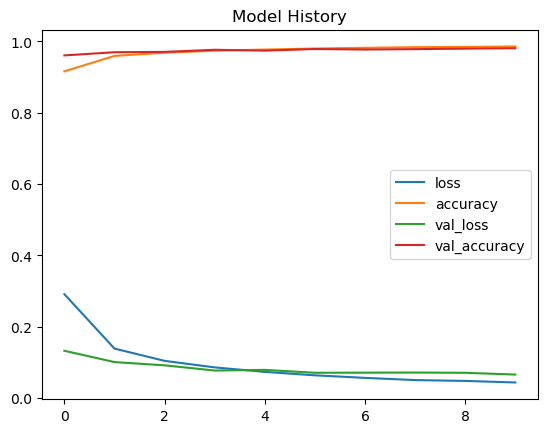

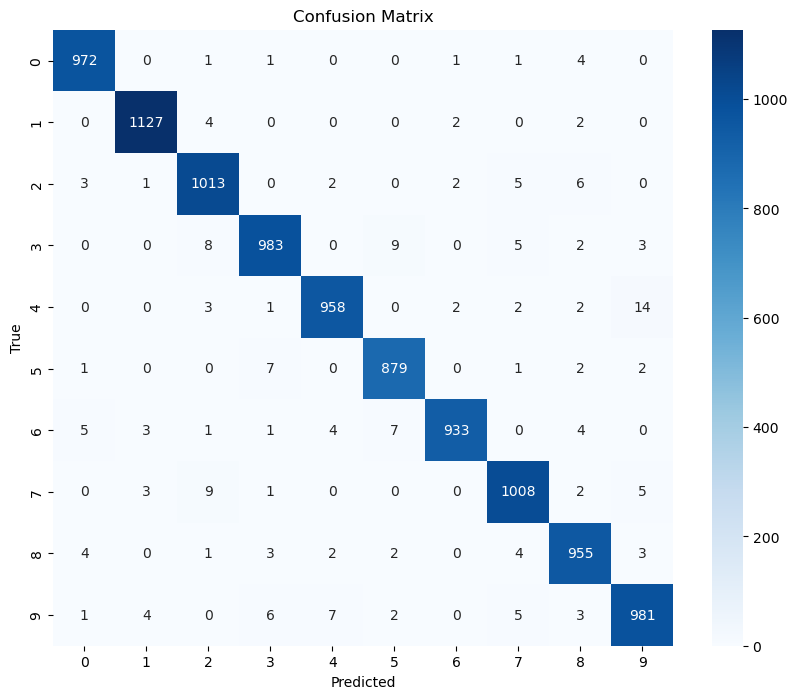

In [21]:
pd.DataFrame(history.history).plot(title="Model History")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
